In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP2 - 1er cuatri 2021
En esta carpeta de Jupyter vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Métodos
Los métodos evaluados en este notebook son los siguientes:

- **VMC** : vecino mas cercano
- **AGM** : arbol generador minimo
- **I** : incersion

# Experimentos
Leemos el dataframe con todos los resultados.

In [18]:
df_resultados = pd.read_csv("resultados/expComparacion.csv");
df_resultados

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage
0,ch150,150,AGM,1.472310,9315.0,0,0,0,0
1,ch150,150,AGM-TS1,5390.930000,8587.0,200,500,50,50
2,ch150,150,AGM-TS2,10251.000000,7507.0,100,500,300,100
3,ch150,150,VMC,0.685514,8191.0,0,0,0,0
4,ch150,150,VMC-TS1,5263.050000,8098.0,100,500,50,50
5,ch150,150,VMC-TS2,5220.460000,8085.0,100,500,300,50
6,ch150,150,I,1043.420000,13855.0,0,0,0,0
7,ch150,150,I-TS1,10775.000000,7876.0,100,500,100,100
8,ch150,150,I-TS2,11399.800000,7737.0,50,500,50,100
9,ch150,150,AGM-TS1,9943.070000,7567.0,200,500,50,100


In [19]:
df_resultados["metodo"].unique()

array(['AGM', 'AGM-TS1', 'AGM-TS2', 'VMC', 'VMC-TS1', 'VMC-TS2', 'I',
       'I-TS1', 'I-TS2'], dtype=object)

# Buscar parametros optimos tabu

## GAP
Creamos un dataframe para analizar el GAP relativo de cada metodo 


Gap relativo = (costo-optimo) /optimo

In [20]:
## gap = costo / optimo * 100 - 100 = gap
def gap(costo, optimo):
    return int(costo / optimo * 100 - 100)

dic_optimos = {'ch150': 6528}

df_gap = df_resultados[(df_resultados["dataset"] == "berlin52") | (df_resultados["dataset"] == "ch150")].copy();
#df_gap.drop(df_gap.columns[[5,6,7,8]], axis=1, inplace=True)
list_gap = []
list_optimo = []
for index, row in df_gap.iterrows():
    costo = int(row['costo'])
    optimo = dic_optimos[row['dataset']]
    value_gap = (costo - optimo) / optimo 
    list_optimo.append(dic_optimos[row['dataset']])
    list_gap.append(value_gap)


df_gap['optimo'] = list_optimo
df_gap['gap'] = list_gap

In [21]:
df_gap.sort_values(by=['gap'],ascending=True)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
2,ch150,150,AGM-TS2,10251.000000,7507.0,100,500,300,100,6528,0.149969
9,ch150,150,AGM-TS1,9943.070000,7567.0,200,500,50,100,6528,0.159161
8,ch150,150,I-TS2,11399.800000,7737.0,50,500,50,100,6528,0.185202
7,ch150,150,I-TS1,10775.000000,7876.0,100,500,100,100,6528,0.206495
5,ch150,150,VMC-TS2,5220.460000,8085.0,100,500,300,50,6528,0.238511
4,ch150,150,VMC-TS1,5263.050000,8098.0,100,500,50,50,6528,0.240502
3,ch150,150,VMC,0.685514,8191.0,0,0,0,0,6528,0.254749
1,ch150,150,AGM-TS1,5390.930000,8587.0,200,500,50,50,6528,0.315411
0,ch150,150,AGM,1.472310,9315.0,0,0,0,0,6528,0.426930
6,ch150,150,I,1043.420000,13855.0,0,0,0,0,6528,1.122396


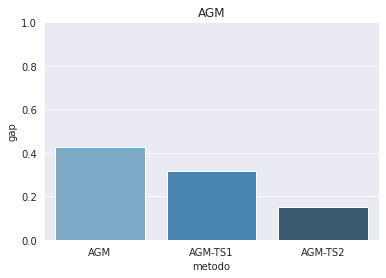

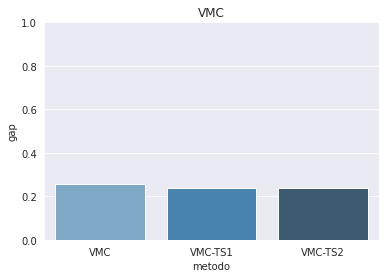

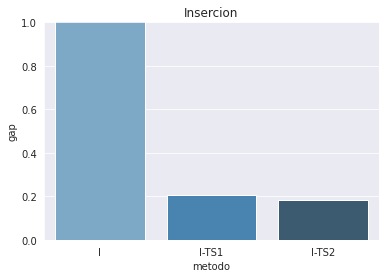

In [11]:
df = df_gap.copy()


df_vmc = df_gap[ (df["metodo"] == "AGM") | (df["metodo"] == "AGM-TS1")| (df["metodo"] == "AGM-TS2")]
sns.set_style("darkgrid")
plt.ylim(0.0, 1.0)
sns.barplot(data = df_vmc,x ="metodo",y = "gap",palette="Blues_d" )
plt.title("AGM")
plt.savefig("graficos/AGM-TS.svg")
plt.show()

plt.ylim(0.0, 1.0)
df_agm = df_gap[ (df["metodo"] == "VMC") | (df["metodo"] == "VMC-TS1")| (df["metodo"] == "VMC-TS2")]
sns.barplot(data = df_agm,x ="metodo",y = "gap",palette="Blues_d" )
plt.title("VMC")
plt.savefig("graficos/VMC-TS.svg")
plt.show()

plt.ylim(0.0, 1.0)
df_i = df_gap[ (df["metodo"] == "I") | (df["metodo"] == "I-TS1")| (df["metodo"] == "I-TS2")]
sns.barplot(data = df_i,x ="metodo",y = "gap",palette="Blues_d" )
plt.title("Insercion")
plt.savefig("graficos/I-TS.svg")
plt.show()

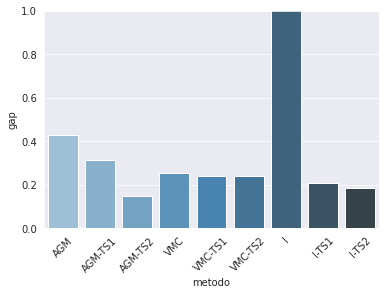

In [52]:
df = df_gap.drop(9)
sns.set_style("darkgrid")
plt.ylim(0.0, 1.0)
sns.barplot(data = df,x ="metodo",y = "gap",palette="Blues_d" )
plt.xticks(rotation=45)
plt.savefig("graficos/barplot_tabu_todos.svg")
plt.show()

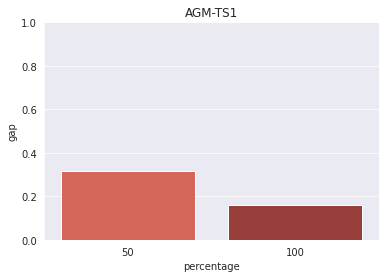

In [31]:
df = df_gap.copy()
df = df[df["metodo"] == "AGM-TS1"]
sns.barplot(data = df, x= "percentage", y = "gap" ,palette="Reds_d")
plt.title("AGM-TS1")
plt.ylim(0.0, 1.0)
plt.savefig("graficos/AGM-TS1-porcentaje.svg")
plt.show()

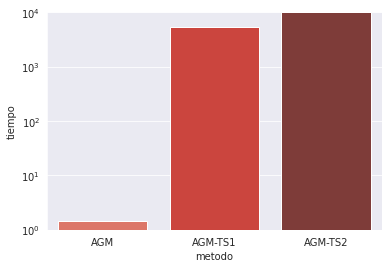

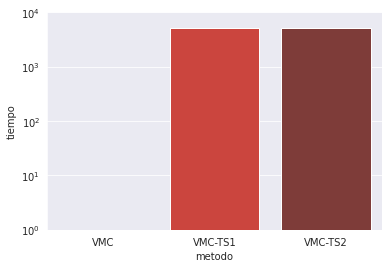

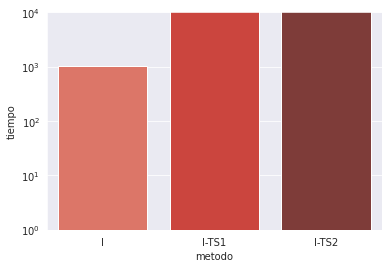

In [15]:
df = df_gap.copy()
df_vmc = df_gap[ (df["metodo"] == "AGM") | (df["metodo"] == "AGM-TS1")| (df["metodo"] == "AGM-TS2")]
sns.set_style("darkgrid")
    
sns.barplot(data = df_vmc,x ="metodo",y = "tiempo",palette="Reds_d" )
plt.yscale('log')          

plt.ylim((10**0,10**4))

plt.show()

df_agm = df_gap[ (df["metodo"] == "VMC") | (df["metodo"] == "VMC-TS1")| (df["metodo"] == "VMC-TS2")]
sns.barplot(data = df_agm,x ="metodo",y = "tiempo",palette="Reds_d")
plt.yscale('log')
plt.ylim((10**0,10**4))
plt.show()

df_i = df_gap[ (df["metodo"] == "I") | (df["metodo"] == "I-TS1")| (df["metodo"] == "I-TS2")]
sns.barplot(data = df_i,x ="metodo",y = "tiempo",palette="Reds_d")
plt.yscale('log')
plt.ylim((10**0,10**4))
plt.show()